# Model training: what features are most important for predicting usage of mobile payment?


## Summary

### Overview

This analysis is the second part of the project to provide insights on characteristics of mobile payment adopters via exploratory data analysis. Mobile payment adopter is defined as using tap-and-pay at the point of sale in the last 12 months.

- This question is of interest to merchants and especially small-scale businesses, who may consider whether to accept mobile payment in store. By comparing characteristics of target consumers and mobile payment adopters, businesses can evaluate the potential benefit and cost of accepting mobile payment.

- Mobile payment app developers may also be interested in knowing the characteristics of likely adopters for marketing purposes and room for potential expansion.

I use data from 2019 Survey of Consumer Payment Choice, a yearly survey conducted by the Federal Reserve Bank of Atlanla, for the project.

### High-level findings

- The best performing model is **XGBoost Classifier**, with an F1-score of 0.411, precision of 0.315 and recall of 0.590.

    - The baseline logistic regression model (without regularization) with F1-score of 0.181.

- The ten most important features for prediction are: whether a person is currently working, age, education, hourswork, education, hourswork, adoption of debit and credit card, household income, and (certain) census divisions.

### Methodology

**Data preprocessing**: one-hot encoding, standardization and spliting into train and test set (80%-20% split)

- Standardization is needed for logitstic regression with regularization

**Model training**: I train the following models using the *training* data:

- Logistic regression (without regularization): as a baseline model
    
- Logistic regression with lasso and ride regularization, using cross validation to pick the penalty and class weight
    
- Random Forest, using cross validation to pick the depth of each tree and class weight
    
- XGBoost, using cross validation to pick the number of estimator, learning rate, depth of each tree, subsample rate and class weight
    
- 
 
**Model evaluation**: The data is imbalanced (less than 15% weighted observations are mobile adopters in the training data.) Therefore, using accuracy is not ideal because a naive model that always predict non-adoption will have high accuracy.

- To address this concern, I evaluate model performance on the *test* data using **F1-score**. To understand how the models are performing better, I also compute accuracy, AOC curve and precision and recall.

- I calculate *feature importances* to understand which features are the most important for prediction.

### Future exploration possibilities

- **Other ways of dealing with imbalaned data**: There are many other ways to deal with imbalaned data (e.g., changing the threshold probability to classify an observation as positive) and I have only explored a few. 

- **Further fine-tune the models**: While I try to include a number of hyperparameters in cross validation grid search, ideally one will want to use even finer grids and consider other parameters (e.g., early stopping).

- **Other ways of calculating features importance**: one may also want to consider permutation feature importance and SHAP values.

### Notes

- For exploratory data analyis and data preparation process, please refer to the Exploratory_data_analysis notebook.

- Education is currently treated as a continuous variable that is not directly corresponding to years of education. While the current encoding is positively related to the number of years spent on education (e.g., value of education of having a masters degree is greater than that of having a bachelors degree, which in turn is greater than having some college but no degree), for robustness one may want to explore alternative way of encoding education.



## References

- Federal Reserve Bank of Atlanta. (2020, May 19). 2019 SCPC Questionnaire. Retrieved September 26, 2021, from https://www.atlantafed.org/-/media/documents/banking/consumer-payments/survey-of-consumer-payment-choice/2019/2019_SCPC_Questionnaire.pdf. 

- Foster, K. (2020, April 10). Codebook and Data Guide to the 2019 Survey of Consumer Payment Choice. Retrieved September 26, 2021, from https://www.atlantafed.org/-/media/documents/banking/consumer-payments/survey-of-consumer-payment-choice/2019/scpc_2019_codebook.pdf. 

- Foster, K., Greene, C., &amp; Stavins, J. (2020, June 16). The 2019 Survey of Consumer Payment  Choice: Summary Results. Retrieved September 26, 2021, from https://doi.org/10.29338/rdr2020-03. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-training:-what-features-are-most-important-for-predicting-usage-of-mobile-payment?" data-toc-modified-id="Model-training:-what-features-are-most-important-for-predicting-usage-of-mobile-payment?-1">Model training: what features are most important for predicting usage of mobile payment?</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1.1">Summary</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1.1">Overview</a></span></li><li><span><a href="#High-level-findings" data-toc-modified-id="High-level-findings-1.1.2">High-level findings</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.1.3">Methodology</a></span></li><li><span><a href="#Future-exploration-possibilities" data-toc-modified-id="Future-exploration-possibilities-1.1.4">Future exploration possibilities</a></span></li><li><span><a href="#Notes" data-toc-modified-id="Notes-1.1.5">Notes</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-1.2">References</a></span></li></ul></li><li><span><a href="#Set-up-and-import-data" data-toc-modified-id="Set-up-and-import-data-2">Set-up and import data</a></span><ul class="toc-item"><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-2.1">Import packages</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2.2">Import data</a></span></li></ul></li><li><span><a href="#Pre-training-cleaning" data-toc-modified-id="Pre-training-cleaning-3">Pre-training cleaning</a></span><ul class="toc-item"><li><span><a href="#Convert-dtypes-for-categorical-variables" data-toc-modified-id="Convert-dtypes-for-categorical-variables-3.1">Convert dtypes for categorical variables</a></span></li><li><span><a href="#Split-data-into-train-and-test-set" data-toc-modified-id="Split-data-into-train-and-test-set-3.2">Split data into train and test set</a></span></li><li><span><a href="#Standardize-data" data-toc-modified-id="Standardize-data-3.3">Standardize data</a></span></li></ul></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-4">Logistic regression</a></span><ul class="toc-item"><li><span><a href="#Without-regularization" data-toc-modified-id="Without-regularization-4.1">Without regularization</a></span><ul class="toc-item"><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-4.1.1">Model evaluation</a></span></li></ul></li><li><span><a href="#With-regularization" data-toc-modified-id="With-regularization-4.2">With regularization</a></span><ul class="toc-item"><li><span><a href="#Lasso" data-toc-modified-id="Lasso-4.2.1">Lasso</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-4.2.2">Ridge</a></span></li><li><span><a href="#Comparison-of-performance" data-toc-modified-id="Comparison-of-performance-4.2.3">Comparison of performance</a></span><ul class="toc-item"><li><span><a href="#Lasso" data-toc-modified-id="Lasso-4.2.3.1">Lasso</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-4.2.3.2">Ridge</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5">Random Forest</a></span><ul class="toc-item"><li><span><a href="#Performance-evaluation" data-toc-modified-id="Performance-evaluation-5.1">Performance evaluation</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-6">XGBoost</a></span><ul class="toc-item"><li><span><a href="#Evaluation-of-performance" data-toc-modified-id="Evaluation-of-performance-6.1">Evaluation of performance</a></span></li></ul></li><li><span><a href="#Comparison-and-Summary" data-toc-modified-id="Comparison-and-Summary-7">Comparison and Summary</a></span></li></ul></div>

# Set-up and import data

## Import packages

In [1]:
import pandas as pd
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle # for matching colors
import patsy
from pandas.api.types import is_numeric_dtype

#statisc images of plot embedded in the notebook
%matplotlib inline 

# set plotting style used
plt.style.use('seaborn-whitegrid')

# Set the color paletter
sns.set_palette('Set2')

In [2]:
# ML related
from statsmodels.stats.weightstats import DescrStatsW
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve, make_scorer, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [3]:
# Display multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Pandas display setting
# Adopted from https://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Import data

In [5]:
PATH_INPUT_DATA = '/Users/sharonshiao/Dropbox/Data Science/projects/payment/data/processed/data_preprocessed_final.csv'
df = pd.read_csv(PATH_INPUT_DATA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            3064 non-null   int64  
 1   census_division                3064 non-null   float64
 2   currentlivingsituation         3064 non-null   float64
 3   own_prim_home                  3064 non-null   float64
 4   education                      3064 non-null   int64  
 5   employmenttype                 3064 non-null   float64
 6   male                           3064 non-null   int64  
 7   hourswork                      3064 non-null   float64
 8   laborstatus                    3064 non-null   float64
 9   race                           3064 non-null   float64
 10  r_weight                       3064 non-null   float64
 11  cc_adopt                       3064 non-null   float64
 12  dc_adopt                       3064 non-null   f

In [7]:
df.head()

,age,census_division,currentlivingsituation,own_prim_home,education,employmenttype,male,hourswork,laborstatus,race,r_weight,cc_adopt,dc_adopt,mpay_tap_and_pay_1year,log_hhincome,log_fico_score,log_prim_home_mkt_value,log_assets_non_home_mkt_value
0,36,1.0,1.0,1.0,14,2.0,1,40.0,1.0,1.0,0.812124,1.0,1.0,0.0,11.736069,6.652863,12.706851,11.512935
1,44,1.0,1.0,1.0,11,3.0,1,40.0,1.0,1.0,0.501038,1.0,1.0,0.0,11.736069,6.652863,12.611541,12.765691
2,29,1.0,1.0,0.0,9,2.0,1,50.0,1.0,1.0,4.001276,1.0,1.0,0.0,10.915088,6.437752,0.000000,8.517393
3,70,1.0,1.0,1.0,10,5.0,1,0.0,5.0,1.0,0.578859,1.0,1.0,0.0,11.119883,6.586172,12.301387,0.000000
4,58,1.0,5.0,1.0,13,2.0,0,40.0,1.0,1.0,0.712038,1.0,1.0,0.0,10.915088,6.652863,12.117247,8.517393


# Pre-training cleaning

- One-hot encoding

- Split data into train and test set (matrix form)

- Standardize data

## Convert dtypes for categorical variables

In [8]:
# Turn variables into strings (categorical variables)
vars_cat = [
    'census_division',
    'currentlivingsituation',
    'employmenttype',
    'laborstatus',
    'race'
]

df1 = df.astype({x: 'str' for x in vars_cat})

In [9]:
# Make sure dtypes are correct
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            3064 non-null   int64  
 1   census_division                3064 non-null   object 
 2   currentlivingsituation         3064 non-null   object 
 3   own_prim_home                  3064 non-null   float64
 4   education                      3064 non-null   int64  
 5   employmenttype                 3064 non-null   object 
 6   male                           3064 non-null   int64  
 7   hourswork                      3064 non-null   float64
 8   laborstatus                    3064 non-null   object 
 9   race                           3064 non-null   object 
 10  r_weight                       3064 non-null   float64
 11  cc_adopt                       3064 non-null   float64
 12  dc_adopt                       3064 non-null   f

## Split data into train and test set

In [10]:
# Split data into train and test set and create the predictor matrix
### Inputs
# df: data frame
# outcome: name of the outcome variable
# dict_cat: a dictionary with names of categorical variables as the key and values of the default group as the values
# list_predictors (optional): list of predictors; if not provided, use all non-outcome columns from df
### Output:
# X: predictor matrix (N*p, N=#obs, p=#predictors), WITHOUT intercept
# cols_X: names of the predictors
def create_X_mat(df, outcome, dict_cat={}, list_predictors=[]):

    # Create list of non-categorical predictors if the list is not provided
    if not list_predictors:
        list_predictors = [
            col for col in df.columns
            if col not in [outcome, 'Intercept'] + list(dict_cat.keys())
        ]

    # Avoid accidentally including intercept in the list of predictors specified; otherwise patsy will throw an error
    if 'Intercept' in list_predictors:
        list_predictors.remove('Intercept')

    formula_patsy = outcome + ' ~ ' + '+'.join(list_predictors)

    # Add categorical variables with prespecified default group into the formula
    if dict_cat:
        for key, val in dict_cat.items():
            formula_patsy += f'+C({key}, Treatment(reference="{val}"))'

    # Create the matrix using patsy
    _, X = patsy.dmatrices(formula_patsy, df, return_type='matrix')
    cols_X = X.design_info.column_names[1:]
    X = X[:, 1:]

    return X, cols_X


# A function to prepare data for model training
### Inputs
# df: data frame
# outcome: name of the outcome variable
# weight: name of the weights of observations
# test_size: (between 0 and 1) fraction of observations in test set
# rnd_state: random state for reproducibility of results
# dict_cat: a dictionary with names of categorical variables as the key and values of the default group as the values
### Output:
# df_train, df_test: data frame for train and test data
# y_train, y_test: outcomes for train and test data
# X_train, X_test: predictor matrix for train and test data
# weights_train, weights_test: weights for train and test data
# cols_X_train, cols_X_test: names of predictors
def prepare_data(df, outcome, weight, test_size, rnd_state, dict_cat={}):

    y = df[outcome]

    # Split data into train and test
    df_train, df_test, y_train, y_test = train_test_split(
        df, y, test_size=test_size, random_state=rnd_state)

    # Get the observations weights
    weights_train = df_train[weight]
    weights_test = df_test[weight]

    # Remove the weights and outcome from the df
    df_train = df_train.drop(columns=[weight])
    df_test = df_test.drop(columns=[weight])

    X_train, cols_X_train = create_X_mat(df_train, outcome, dict_cat)
    X_test, cols_X_test = create_X_mat(df_test, outcome, dict_cat)

    return df_train, df_test, y_train, y_test, X_train, X_test, weights_train, weights_test, cols_X_train, cols_X_test

In [11]:
# Dictionary for the "default" group of each categorical variable
dict_cat = {
    'currentlivingsituation': '5.0',
    'employmenttype': '5.0',
    'laborstatus': '5.0'
}

In [12]:
# Split the main data
df_train, df_test, y_train, y_test, X_train, X_test, weights_train, weights_test, cols_X_train, cols_X_test = prepare_data(
    df1, 'mpay_tap_and_pay_1year', 'r_weight', 0.2, 1234, dict_cat)

In [13]:
# Check balances of labels in test and train set
# Ok they are similar, so we don't have to be too worried
np.average(y_train, weights=weights_train)
np.average(y_test, weights=weights_test)

0.14483036153981452

0.15570735096677835

In [14]:
# Sanity check of the shape of df and matrices
df_train.info()
df_test.info()
X_train.shape
X_test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2451 entries, 1675 to 2863
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            2451 non-null   int64  
 1   census_division                2451 non-null   object 
 2   currentlivingsituation         2451 non-null   object 
 3   own_prim_home                  2451 non-null   float64
 4   education                      2451 non-null   int64  
 5   employmenttype                 2451 non-null   object 
 6   male                           2451 non-null   int64  
 7   hourswork                      2451 non-null   float64
 8   laborstatus                    2451 non-null   object 
 9   race                           2451 non-null   object 
 10  cc_adopt                       2451 non-null   float64
 11  dc_adopt                       2451 non-null   float64
 12  mpay_tap_and_pay_1year         2451 non-null 

(2451, 39)

(613, 38)

In [15]:
# For any missing columns because there's no such group (for a categorical variable) in the test data
# create a column of zeros in the corresponding position in the X matrix
# This way of cleaning is specific to the situation where there are more variables in train than test, and no
# missing variables that are only in test but not train
vars_to_add = []
vars_to_add_index = []

for i, var in enumerate(cols_X_train):
    if var not in cols_X_test:
        vars_to_add.append(var)
        vars_to_add_index.append(i)
        
print(vars_to_add)

for i, var in enumerate(vars_to_add):
    
    tmp_index = vars_to_add_index[i]
    X_test = np.hstack((X_test[:,:tmp_index],
                            np.zeros(X_test.shape[0]).reshape((X_test.shape[0],1)),
                            X_test[:,tmp_index:]))
    cols_X_test = cols_X_test[:tmp_index] + [var] + cols_X_test[tmp_index:]
    
print(f'Check whether test and train contains same number of columns: {X_test.shape[1] == X_train.shape[1]}')

['race[T.5.0]']
Check whether test and train contains same number of columns: True


## Standardize data

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

StandardScaler()

# Logistic regression

## Without regularization

While theoretically I do not have to standardize data for logistic regression alone, I standardize data here to faciliate the convergence/ computation process.

In [17]:
fit_logit_sklearn = LogisticRegression(
    fit_intercept=True,
    penalty='none',
    max_iter=1000
).fit(X_train_std, y_train, sample_weight=weights_train)

In [18]:
# Print results
pd.DataFrame({'Var': ['Intercept'] + cols_X_train,
             'Coef': np.append(fit_logit_sklearn.intercept_,fit_logit_sklearn.coef_.tolist())})

,Var,Coef
0,Intercept,-2.398366
1,census_division[T.2.0],0.073025
2,census_division[T.3.0],0.317245
3,census_division[T.4.0],0.100794
4,census_division[T.5.0],0.359183
5,census_division[T.6.0],0.437488
6,census_division[T.7.0],0.248810
7,census_division[T.8.0],0.221712
8,census_division[T.9.0],0.303437
9,race[T.2.0],0.001536


In [19]:
# Check with statsmmodel
# Also see which coefs are stats sig
fit_logit_statsmodel = sm.GLM(y_train,
       sm.tools.tools.add_constant(X_train_std),
       family = sm.families.Binomial(),
       var_weights=weights_train).fit()

fit_logit_statsmodel.summary(xname = ['Intercept'] +cols_X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                    
==================================================================================
Dep. Variable:     mpay_tap_and_pay_1year   No. Observations:                 2451
Model:                                GLM   Df Residuals:                     2411
Model Family:                    Binomial   Df Model:                           39
Link Function:                      logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -860.17
Date:                    Sun, 26 Sep 2021   Deviance:                       1720.3
Time:                            22:10:42   Pearson chi2:                 2.61e+03
No. Iterations:                        22                                         
Covariance Type:                nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       -2.4722    135.130     -0.018      0.985    -267.323     262.379
census_division[T.2.0]                                           0.0733      0.146      0.503      0.615      -0.212       0.359
census_division[T.3.0]                                           0.3175      0.167      1.907      0.057      -0.009       0.644
census_division[T.4.0]                                           0.1010      0.145      0.695      0.487      -0.184       0.386
census_division[T.5.0]                                           0.3595      0.166      2.159      0.031       0.033       0.686
census_division[T.6.0]                                           0.4376      0.110      3.974      0.000       0.222       0.654
census_division[T.7.0]                                           0.2490      0.124      2.016      0.044       0.007       0.491
census_division[T.8.0]                                           0.2219      0.108      2.058      0.040       0.011       0.433
census_division[T.9.0]                                           0.3037      0.129      2.359      0.018       0.051       0.556
race[T.2.0]                                                      0.0015      0.057      0.027      0.979      -0.110       0.113
race[T.3.0]                                                     -0.0433      0.072     -0.600      0.548      -0.185       0.098
race[T.4.0]                                                      0.1238      0.039      3.160      0.002       0.047       0.201
race[T.5.0]                                                      0.0789      0.039      2.046      0.041       0.003       0.155
race[T.6.0]                                                      0.0807      0.045      1.782      0.075      -0.008       0.169
C(currentlivingsituation, Treatment(reference="5.0"))[T.1.0]     0.0382      0.084      0.457      0.648      -0.126       0.202
C(currentlivingsituation, Treatment(reference="5.0"))[T.2.0]    -0.0743      0.082     -0.901      0.368      -0.236       0.087
C(currentlivingsituation, Treatment(reference="5.0"))[T.3.0]    -0.0319      0.095     -0.336      0.737      -0.217       0.154
C(currentlivingsituation, Treatment(reference="5.0"))[T.4.0]     0.0273      0.109      0.250      0.803      -0.187       0.242
C(employmenttype, Treatment(reference="5.0"))[T.1.0]             0.5203      0.265      1.964      0.049       0.001       1.040
C(employmenttype, Treatment(reference="5.0"))[T.2.0]             0.7371      0.394      1.871      0.061      -0.035       1.509
C(employmenttype, Treatment(reference="5.0"))[T.3.0]             0.3868 

### Model evaluation


- Calculate train, test accuracy

- Calculate the confusion matrix

- Calculate the following statistics on the test set:

    - PR curve, precision and recall
    
    - ROC curve, AUC
    
    - F1
    
- Understand the most important variables

In [20]:
# Using the sklearn model
y_train_pred_logit_sklearn = fit_logit_sklearn.predict(X_train_std)
y_test_pred_logit_sklearn = fit_logit_sklearn.predict(X_test_std)

y_train_prob_logit_sklearn = fit_logit_sklearn.predict_proba(X_train_std)[:,1]
y_test_prob_logit_sklearn = fit_logit_sklearn.predict_proba(X_test_std)[:,1]

In [21]:
# Random guess benchmark (guessing that everyone will not adopt)
print('random guess accuracy:')
np.average(y_test == np.zeros(y_test.shape[0]), weights=weights_test)

print('random guess f1')
f1_score(y_test, np.zeros(y_test.shape[0]), sample_weight=weights_test)

random guess accuracy:


0.8442926490332217

random guess f1


0.0

In [22]:
# Calculate the accuracy for training and test
train_accuracy_logit = fit_logit_sklearn.score(X_train_std, y_train, sample_weight=weights_train)
test_accuracy_logit = fit_logit_sklearn.score(X_test_std, y_test, sample_weight=weights_test)
print(f"Logistic regression's train accuracy: {train_accuracy_logit}")
print(f"Logistic regression's test accuracy: {test_accuracy_logit}")

Logistic regression's train accuracy: 0.862081462869971
Logistic regression's test accuracy: 0.8550905693686173


In [23]:
# F1 score for the logistic regression model
f1_logit = f1_score(y_test, y_test_pred_logit_sklearn, sample_weight=weights_test)
print(f"Logistic regression's test F1 score: {f1_logit}")

Logistic regression's test F1 score: 0.18052000603913815


In [24]:
precision_score_logit =  precision_score(y_test, y_test_pred_logit_sklearn, sample_weight=weights_test)
recall_score_logit = recall_score(y_test, y_test_pred_logit_sklearn, sample_weight=weights_test)
print(f"Logistic regression's precision: {precision_score_logit}")
print(f"Logistic regression's recall: {recall_score_logit}")

Logistic regression's precision: 0.7555889583124478
Logistic regression's recall: 0.10250487539477834


<AxesSubplot:>

[Text(0.5, 19.5, 'Predicted group'),
 Text(37.5, 0.5, 'Actual group'),
 Text(0.5, 1.0, 'Confusion matrix: logistic regression')]

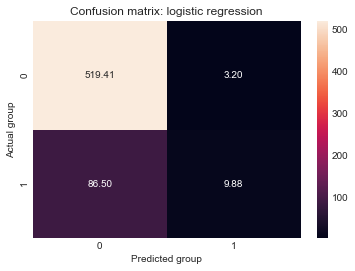

In [25]:
# Confusion matrix
cm_logit_sklean = confusion_matrix(y_test, y_test_pred_logit_sklearn, sample_weight=weights_test)
fig, ax = plt.subplots()

sns.heatmap(cm_logit_sklean,
           annot=True,
           fmt='.2f',
           ax=ax)
ax.set(xlabel='Predicted group',
      ylabel='Actual group',
      title='Confusion matrix: logistic regression')

[]

[Text(0.5, 0, 'Recall'),
 Text(0, 0.5, 'Precision'),
 Text(0.5, 1.0, 'Precision Recall Curve for logistic regression')]

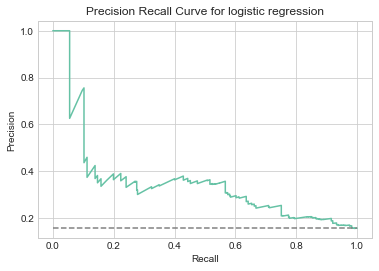

In [26]:
# PR curve
precision_logit, recall_logit, threshold_pr_logit =  precision_recall_curve(y_test, y_test_prob_logit_sklearn, sample_weight=weights_test)

fig, ax = plt.subplots()
ax.plot(recall_logit, precision_logit)
ax.plot([0,1], [np.average(y_test, weights=weights_test), np.average(y_test, weights=weights_test)],
       color='grey',
       linestyle='dashed')
ax.plot()
ax.set(xlabel='Recall',
      ylabel='Precision',
      title='Precision Recall Curve for logistic regression')

Text(0.75, 0.05, 'AUC score: 0.709')

[Text(0.5, 0, 'False positive rate'),
 Text(0, 0.5, 'True positive rate'),
 Text(0.5, 1.0, 'ROC curve for logistic regression')]

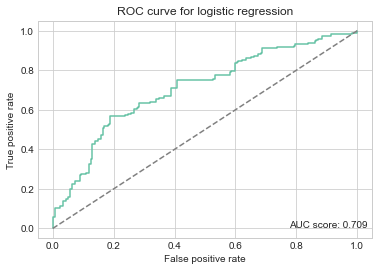

In [27]:
# ROC curve
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, y_test_prob_logit_sklearn, sample_weight=weights_test)
roc_auc_logit = roc_auc_score(y_test, y_test_prob_logit_sklearn, sample_weight=weights_test)

fig, ax = plt.subplots()
ax.plot(fpr_logit, tpr_logit)
ax.plot([0, 1], [0,1], linestyle='dashed', color='grey')
ax.text(0.75, 0.05, f'AUC score: {round(roc_auc_logit, 3)}', transform=ax.transAxes)
ax.set(xlabel='False positive rate',
      ylabel='True positive rate',
      title='ROC curve for logistic regression')

In [28]:
# Which coefficients are stat sig? Show in descneding order
# Interpretation: An increase in 1 sd of the variable is associated in X increase in the log odds ratio
coef_logit_statsmodel = fit_logit_statsmodel.params
coef_logit_statsmodel.index = ['Intercept'] + cols_X_train
pvalues_logit_statsmodel = fit_logit_statsmodel.pvalues
pvalues_logit_statsmodel.index = ['Intercept'] + cols_X_train
coef_logit_statsmodel[pvalues_logit_statsmodel < 0.05].sort_values(ascending=False)

C(employmenttype, Treatment(reference="5.0"))[T.1.0]    0.520347
census_division[T.6.0]                                  0.437640
census_division[T.5.0]                                  0.359467
census_division[T.9.0]                                  0.303661
census_division[T.7.0]                                  0.249007
education                                               0.229749
census_division[T.8.0]                                  0.221872
C(laborstatus, Treatment(reference="5.0"))[T.6.0]       0.219883
dc_adopt                                                0.218953
log_assets_non_home_mkt_value                           0.217806
cc_adopt                                                0.162155
male                                                    0.154398
race[T.4.0]                                             0.123756
race[T.5.0]                                             0.078928
age                                                    -0.504263
dtype: float64

## With regularization

In [29]:
# My own scorer function to take care of sample weighting in evaluation during GridSearchCV
# By default, while I can train the model using sample weights, the scoring in GridSearchCV does not account for sample weights
# Reference: https://stackoverflow.com/questions/49581104/sklearn-gridsearchcv-not-using-sample-weight-in-score-function
# Note that this makes use of the index of outcome and weights
def myScore(y_true, y_pred, sample_weight):
    my_sample_weight = sample_weight.loc[y_true.index.values].values.reshape(-1)
    return f1_score(y_true, y_pred, sample_weight=my_sample_weight)

score_params = {'sample_weight': weights_train}

my_scorer = make_scorer(myScore, greater_is_better=True, needs_proba=False, needs_threshold=False, **score_params)

### Lasso

- I use cross validation to pick the penalty parameter and class weight.

In [30]:
grid_lasso = {
    'C':np.logspace(-4, 4, 10),
    'class_weight': [{0:x, 1:1-x} for x in np.arange(0.0, 0.51, 0.05)]
}

gs_logit_lasso = GridSearchCV(
    LogisticRegression(
        penalty='l1',
        fit_intercept=True,
        solver='liblinear',
        max_iter=1000
    ),
    param_grid=grid_lasso,
    scoring=my_scorer,
    cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=321)
)

gs_logit_lasso.fit(X_train_std, y_train, sample_weight=weights_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=321, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'class_weight': [{0: 0.0, 1...
                                          {0: 0.2, 1: 0.8}, {0: 0.25, 1: 0.75},
                                          {0: 0.30000000000000004, 1: 0.7},
                                          {0: 0.35000000000000003,
                                           1: 0.6499999999999999},
                                          {0: 0.4, 1: 0.6}, {0: 0.45, 1: 0.55},
                                          {0: 0.5, 1: 0.5}]},
             scoring=make_scorer(myScore, sample_weight=1675    0.249987
1524    0.4884

In [31]:
lasso_cv_class_weights = gs_logit_lasso.best_params_['class_weight']
print(f'Best CV class_weights: {lasso_cv_class_weights}')
lasso_cv_results_best_class_weights = gs_logit_lasso.cv_results_['mean_test_score'][[lasso_cv_class_weights == x for x in gs_logit_lasso.cv_results_['param_class_weight']]]

Best CV class_weights: {0: 0.2, 1: 0.8}


<AxesSubplot:>

[Text(0.5, 1.0, 'F1 score, class_weight: {0: 0.2, 1: 0.8}'),
 Text(0.5, 0, 'log(C)')]

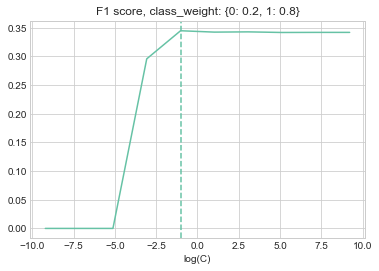

In [32]:
# For the best class_weight, plot how F1 score varies with C
fig, ax = plt.subplots()
sns.lineplot(x=np.log(grid_lasso['C']),
             y=lasso_cv_results_best_class_weights,
             ax=ax)
ax.axvline(x=np.log(gs_logit_lasso.best_params_['C']), linestyle='dashed')
ax.set(title=f'F1 score, class_weight: {lasso_cv_class_weights}',
      xlabel='log(C)')

In [33]:
gs_logit_lasso.best_estimator_.coef_

array([[-0.08908996,  0.        , -0.09068048,  0.06087927,  0.20075248,
         0.01319832,  0.03980956,  0.08702023,  0.        , -0.01504629,
         0.09200694,  0.06362363,  0.05401498,  0.        , -0.03679426,
        -0.04639514,  0.        ,  0.05081485,  0.04657705,  0.        ,
         0.        ,  0.1521327 , -0.1312311 , -0.1432347 , -0.04002125,
         0.1511146 , -0.03563511,  0.02196611, -0.45476439, -0.17515346,
         0.20377593,  0.09002784, -0.00700928,  0.11540137,  0.21701363,
         0.07272267,  0.        ,  0.        ,  0.22526043]])

In [34]:
# Show results of the best mode
coef_logit_lasso = pd.DataFrame({
    'Var': ['Intercept'] + cols_X_train,
    'Coef': np.append(gs_logit_lasso.best_estimator_.intercept_,gs_logit_lasso.best_estimator_.coef_.tolist())})

print('Lasso non-zero coefficients')
coef_logit_lasso[coef_logit_lasso.Coef!= 0].sort_values(by='Coef', ascending=False)

Lasso non-zero coefficients


,Var,Coef
39,log_assets_non_home_mkt_value,0.225260
35,dc_adopt,0.217014
31,education,0.203776
5,census_division[T.6.0],0.200752
22,"C(laborstatus, Treatment(reference=""5.0""))[T.1.0]",0.152133
26,"C(laborstatus, Treatment(reference=""5.0""))[T.6.0]",0.151115
34,cc_adopt,0.115401
11,race[T.4.0],0.092007
32,male,0.090028
8,census_division[T.9.0],0.087020


In [35]:
# Get best estimator
fit_logit_lasso_cv = gs_logit_lasso.best_estimator_

### Ridge

- I use cross validation to pick penalty parameter and class weight.

In [36]:
grid_ridge = {
    'C':np.logspace(-4, 4, 10),
    'class_weight': [{0:x, 1:1-x} for x in np.arange(0.00, 0.55, 0.05)]
}

gs_logit_ridge = GridSearchCV(
    LogisticRegression(
        penalty='l2',
        fit_intercept=True,
        class_weight={0:1, 1:10},
        solver='liblinear',
        max_iter=1000
    ),
    param_grid=grid_ridge,
    scoring=my_scorer,
    cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=321)
)

gs_logit_ridge.fit(X_train_std, y_train, sample_weight=weights_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=321, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 1, 1: 10},
                                          max_iter=1000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'class_weight...
                                          {0: 0.2, 1: 0.8}, {0: 0.25, 1: 0.75},
                                          {0: 0.30000000000000004, 1: 0.7},
                                          {0: 0.35000000000000003,
                                           1: 0.6499999999999999},
                                          {0: 0.4, 1: 0.6}, {0: 0.45, 1: 0.55},
                                          {0: 0.5, 1: 0.5}]},
             scoring=make_scorer(myScore, sample_weight=1675    0.249987
1524    0.4884

In [37]:
ridge_cv_class_weights = gs_logit_ridge.best_params_['class_weight']
print(f'Best CV class_weights: {ridge_cv_class_weights}')
ridge_cv_results_best_class_weights = gs_logit_ridge.cv_results_['mean_test_score'][[ridge_cv_class_weights == x for x in gs_logit_ridge.cv_results_['param_class_weight']]]

Best CV class_weights: {0: 0.2, 1: 0.8}


<AxesSubplot:>

[Text(0.5, 1.0, 'F1 score, class_weight={0: 0.2, 1: 0.8}'),
 Text(0.5, 0, 'log(C)')]

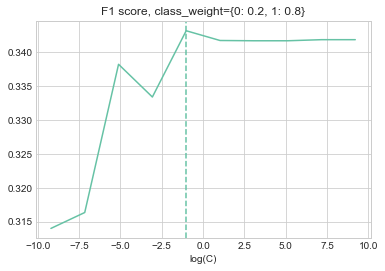

In [38]:
fig, ax = plt.subplots()
sns.lineplot(x=np.log(grid_ridge['C']),
             y=ridge_cv_results_best_class_weights,
             ax=ax)
ax.axvline(x=np.log(gs_logit_ridge.best_params_['C']), linestyle='dashed')
ax.set(title=f'F1 score, class_weight={ridge_cv_class_weights}',
      xlabel='log(C)')

In [39]:
# Show results of the best mode
coef_logit_ridge = pd.DataFrame({
    'Var': ['Intercept'] + cols_X_train,
    'Coef': np.append(gs_logit_ridge.best_estimator_.intercept_,gs_logit_ridge.best_estimator_.coef_.tolist())})

coef_logit_ridge.sort_values(by='Coef', ascending=False).head(10)

,Var,Coef
5,census_division[T.6.0],0.320508
19,"C(employmenttype, Treatment(reference=""5.0""))[...",0.310881
39,log_assets_non_home_mkt_value,0.250163
4,census_division[T.5.0],0.231790
18,"C(employmenttype, Treatment(reference=""5.0""))[...",0.227142
35,dc_adopt,0.223681
31,education,0.223497
8,census_division[T.9.0],0.208201
26,"C(laborstatus, Treatment(reference=""5.0""))[T.6.0]",0.207852
20,"C(employmenttype, Treatment(reference=""5.0""))[...",0.159276


In [40]:
# Get best estimator
fit_logit_ridge_cv = gs_logit_ridge.best_estimator_

### Comparison of performance

#### Lasso

In [41]:
# Using the sklearn model
y_train_pred_logit_lasso = fit_logit_lasso_cv.predict(X_train_std)
y_test_pred_logit_lasso = fit_logit_lasso_cv.predict(X_test_std)

y_train_prob_logit_lasso = fit_logit_lasso_cv.predict_proba(X_train_std)[:,1]
y_test_prob_logit_lasso = fit_logit_lasso_cv.predict_proba(X_test_std)[:,1]

In [42]:
# Calculate the accuracy for training and test
train_accuracy_lasso = fit_logit_lasso_cv.score(X_train_std, y_train, sample_weight=weights_train)
test_accuracy_lasso = fit_logit_lasso_cv.score(X_test_std, y_test, sample_weight=weights_test)
print(f"Lasso's train data accuracy: {train_accuracy_lasso}")
print(f"Lasso's test data accuracy: {test_accuracy_lasso}")

Lasso's train data accuracy: 0.7573242892053856
Lasso's test data accuracy: 0.7409159844536801


In [43]:
# F1 score
f1_lasso = f1_score(y_test, y_test_pred_logit_lasso, sample_weight=weights_test)
print(f"Lasso's test F1 score: {f1_lasso}")

Lasso's test F1 score: 0.39468113388919135


In [44]:
precision_score_lasso = precision_score(y_test, y_test_pred_logit_lasso, sample_weight=weights_test)
recall_score_lasso = recall_score(y_test, y_test_pred_logit_lasso, sample_weight=weights_test)
print(f"Lasso's precision: {precision_score_lasso}")
print(f"Lasso's recall: {recall_score_lasso}")

Lasso's precision: 0.3101822880986212
Lasso's recall: 0.5424549356704857


<AxesSubplot:>

[Text(0.5, 19.5, 'Predicted group'),
 Text(37.5, 0.5, 'Actual group'),
 Text(0.5, 1.0, 'Confusion matrix: logistic regression (lasso)')]

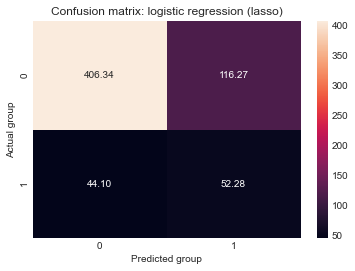

In [45]:
# Confusion matrix
cm_logit_lasso = confusion_matrix(y_test, y_test_pred_logit_lasso, sample_weight=weights_test)
fig, ax = plt.subplots()

sns.heatmap(cm_logit_lasso,
           annot=True,
           fmt='.2f',
           ax=ax)
ax.set(xlabel='Predicted group',
      ylabel='Actual group',
      title='Confusion matrix: logistic regression (lasso)')

[]

[Text(0.5, 0, 'Recall'),
 Text(0, 0.5, 'Precision'),
 Text(0.5, 1.0, 'Precision Recall Curve for logistic regression (lasso)')]

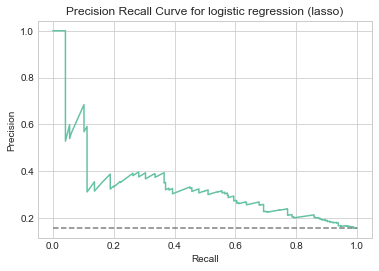

In [46]:
# PR curve
precision_logit_lasso, recall_logit_lasso, threshold_pr_logit_lasso =  precision_recall_curve(y_test, y_test_prob_logit_lasso, sample_weight=weights_test)

fig, ax = plt.subplots()
ax.plot(recall_logit_lasso, precision_logit_lasso)
ax.plot([0,1], [np.average(y_test, weights=weights_test), np.average(y_test, weights=weights_test)],
       color='grey',
       linestyle='dashed')
ax.plot()
ax.set(xlabel='Recall',
      ylabel='Precision',
      title='Precision Recall Curve for logistic regression (lasso)')

Text(0.75, 0.05, 'AUC score: 0.703')

[Text(0.5, 0, 'False positive rate'),
 Text(0, 0.5, 'True positive rate'),
 Text(0.5, 1.0, 'ROC curve for logistic regression (lasso)')]

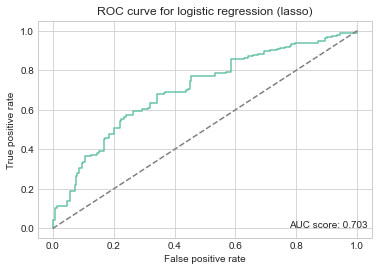

In [47]:
# ROC curve
fpr_logit_lasso, tpr_logit_lasso, thresholds_logit_lasso = roc_curve(y_test, y_test_prob_logit_lasso, sample_weight=weights_test)
roc_auc_logit_lasso = roc_auc_score(y_test, y_test_prob_logit_lasso, sample_weight=weights_test)

fig, ax = plt.subplots()
ax.plot(fpr_logit_lasso, tpr_logit_lasso)
ax.plot([0, 1], [0,1], linestyle='dashed', color='grey')
ax.text(0.75, 0.05, f'AUC score: {round(roc_auc_logit_lasso, 3)}', transform=ax.transAxes)
ax.set(xlabel='False positive rate',
      ylabel='True positive rate',
      title='ROC curve for logistic regression (lasso)')

#### Ridge

In [48]:
# Using the sklearn model
y_train_pred_logit_ridge = fit_logit_ridge_cv.predict(X_train_std)
y_test_pred_logit_ridge = fit_logit_ridge_cv.predict(X_test_std)

y_train_prob_logit_ridge = fit_logit_ridge_cv.predict_proba(X_train_std)[:,1]
y_test_prob_logit_ridge = fit_logit_ridge_cv.predict_proba(X_test_std)[:,1]

In [49]:
# Calculate the accuracy for training and test
train_accuracy_ridge = fit_logit_ridge_cv.score(X_train_std, y_train, sample_weight=weights_train)
test_accuracy_ridge = fit_logit_ridge_cv.score(X_test_std, y_test, sample_weight=weights_test)

print(f"ridge's train data accuracy: {train_accuracy_ridge}")
print(f"ridge's test data accuracy: {test_accuracy_ridge}")


ridge's train data accuracy: 0.7619257428588017
ridge's test data accuracy: 0.739532793735091


In [50]:
# F1 score
f1_ridge = f1_score(y_test, y_test_pred_logit_ridge, sample_weight=weights_test)
print(f"Ridge's test f1 score: {f1_ridge}")

Ridge's test f1 score: 0.3998400462805083


In [51]:
precision_score_ridge = precision_score(y_test, y_test_pred_logit_ridge, sample_weight=weights_test)
recall_score_ridge = recall_score(y_test, y_test_pred_logit_ridge, sample_weight=weights_test)
print(f"Ridge's precision: {precision_score_ridge}")
print(f"Ridge's recall: {recall_score_ridge}")

Ridge's precision: 0.31177863636431535
Ridge's recall: 0.557228365344898


<AxesSubplot:>

[Text(0.5, 19.5, 'Predicted group'),
 Text(37.5, 0.5, 'Actual group'),
 Text(0.5, 1.0, 'Confusion matrix: logistic regression (ridge)')]

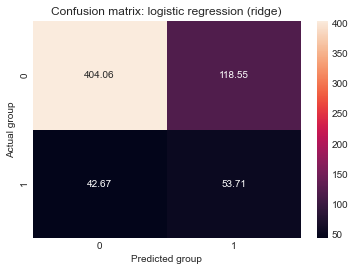

In [52]:
# Confusion matrix
cm_logit_ridge = confusion_matrix(y_test, y_test_pred_logit_ridge, sample_weight=weights_test)
fig, ax = plt.subplots()

sns.heatmap(cm_logit_ridge,
           annot=True,
           fmt='.2f',
           ax=ax)
ax.set(xlabel='Predicted group',
      ylabel='Actual group',
      title='Confusion matrix: logistic regression (ridge)')

[]

[Text(0.5, 0, 'Recall'),
 Text(0, 0.5, 'Precision'),
 Text(0.5, 1.0, 'Precision Recall Curve for logistic regression (ridge)')]

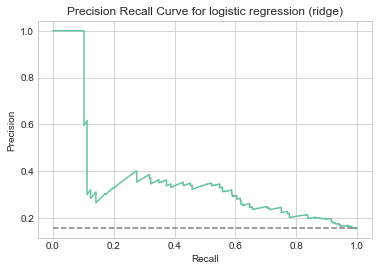

In [53]:
# PR curve
precision_logit_ridge, recall_logit_ridge, threshold_pr_logit_ridge =  precision_recall_curve(y_test, y_test_prob_logit_ridge, sample_weight=weights_test)

fig, ax = plt.subplots()
ax.plot(recall_logit_ridge, precision_logit_ridge)
ax.plot([0,1], [np.average(y_test, weights=weights_test), np.average(y_test, weights=weights_test)],
       color='grey',
       linestyle='dashed')
ax.plot()
ax.set(xlabel='Recall',
      ylabel='Precision',
      title='Precision Recall Curve for logistic regression (ridge)')

Text(0.75, 0.05, 'AUC score: 0.707')

[Text(0.5, 0, 'False positive rate'),
 Text(0, 0.5, 'True positive rate'),
 Text(0.5, 1.0, 'ROC curve for logistic regression (ridge)')]

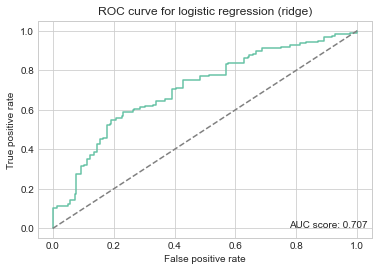

In [54]:
# ROC curve
fpr_logit_ridge, tpr_logit_ridge, thresholds_logit_ridge = roc_curve(y_test, y_test_prob_logit_ridge, sample_weight=weights_test)
roc_auc_logit_ridge = roc_auc_score(y_test, y_test_prob_logit_ridge, sample_weight=weights_test)

fig, ax = plt.subplots()
ax.plot(fpr_logit_ridge, tpr_logit_ridge)
ax.plot([0, 1], [0,1], linestyle='dashed', color='grey')
ax.text(0.75, 0.05, f'AUC score: {round(roc_auc_logit_ridge, 3)}', transform=ax.transAxes)
ax.set(xlabel='False positive rate',
      ylabel='True positive rate',
      title='ROC curve for logistic regression (ridge)')

# Random Forest

- I use cross validation to pick the maximum depth of each tree and class weight.

In [55]:
grid_rf = {
    'max_depth': list(range(3, 10)),
    'class_weight': [{0:x, 1:1-x} for x in np.arange(0.0, 0.51, 0.05)]
}

gs_rf = GridSearchCV(
    RandomForestClassifier(
        n_estimators=500,
        criterion='gini',
        max_features='auto',
        bootstrap=True,
        random_state=123
    ),
    param_grid=grid_rf,
    scoring=my_scorer,
    cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=321)
)

gs_rf.fit(X_train, y_train, sample_weight=weights_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=321, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=123),
             param_grid={'class_weight': [{0: 0.0, 1: 1.0}, {0: 0.05, 1: 0.95},
                                          {0: 0.1, 1: 0.9},
                                          {0: 0.15000000000000002, 1: 0.85},
                                          {0: 0.2, 1: 0.8}, {0: 0.25, 1: 0.75},
                                          {0: 0.30000000000000004, 1: 0.7},
                                          {0: 0.35000000000000003,
                                           1: 0.6499999999999999},
                                          {0: 0.4, 1: 0.6}, {0: 0.45, 1: 0.55},
                                          {0: 0.5, 1: 0.5}],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9]},
             scoring=make_scorer(myScore, sample_weight=1675    0.249987
1524    0.

In [56]:
rf_cv_class_weights = gs_rf.best_params_['class_weight']
print(f'Best CV class_weights: {rf_cv_class_weights}')
rf_cv_results_best_class_weights = gs_rf.cv_results_['mean_test_score'][[rf_cv_class_weights == x for x in gs_rf.cv_results_['param_class_weight']]]

Best CV class_weights: {0: 0.1, 1: 0.9}


In [57]:
print('Parameters picked by CV')
gs_rf.best_params_

Parameters picked by CV


{'class_weight': {0: 0.1, 1: 0.9}, 'max_depth': 5}

<AxesSubplot:>

[Text(0.5, 1.0, 'F1 score, class_weight: {0: 0.1, 1: 0.9}'),
 Text(0.5, 0, 'max_depth')]

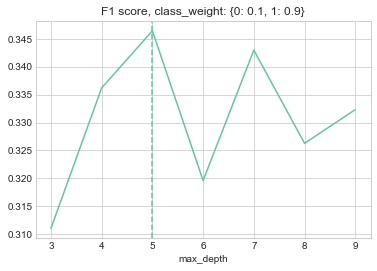

In [58]:
# For the best class_weight, plot how F1 score varies with C
fig, ax = plt.subplots()
sns.lineplot(x=list(range(3, 10)),
             y=rf_cv_results_best_class_weights,
             ax=ax)
ax.axvline(x=gs_rf.best_params_['max_depth'], linestyle='dashed')
ax.set(title=f'F1 score, class_weight: {rf_cv_class_weights}',
      xlabel='max_depth')

In [59]:
# Get best estimator
fit_rf = gs_rf.best_estimator_

<BarContainer object of 10 artists>

[Text(0.5, 0, 'Mean decrease in impurity'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'Feature importances for top 10 features - Random Forest')]

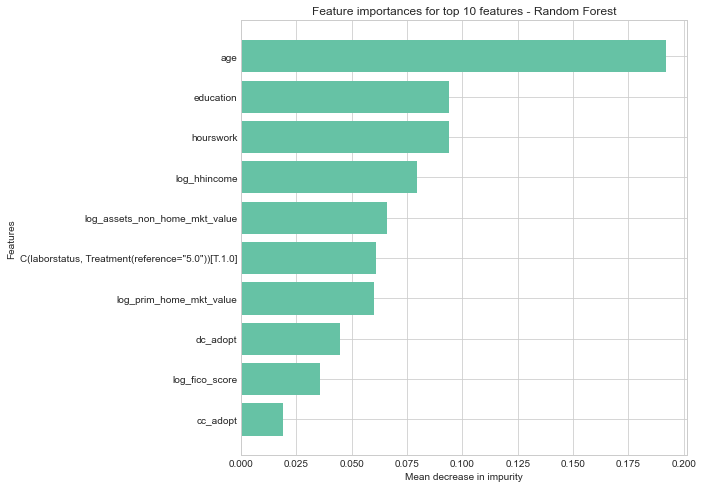

In [60]:
# Look at feature importances
# Would be nice to have a plot here!
feature_importances_rf = pd.DataFrame({
    'Var': cols_X_train,
    'Importance': fit_rf.feature_importances_})\
    .sort_values(by='Importance')

# feature_importances_rf

fig, ax = plt.subplots(figsize=(8,8))
ax.barh(y='Var',
       width='Importance',
       data=feature_importances_rf.tail(10))
ax.set(xlabel='Mean decrease in impurity',
      ylabel='Features',
      title="Feature importances for top 10 features - Random Forest")

## Performance evaluation

In [61]:
# Using the sklearn model
y_train_pred_rf = fit_rf.predict(X_train)
y_test_pred_rf = fit_rf.predict(X_test)

y_train_prob_rf = fit_rf.predict_proba(X_train)[:,1]
y_test_prob_rf = fit_rf.predict_proba(X_test)[:,1]

In [62]:
# Calculate the accuracy for training and test
train_accuracy_rf = fit_rf.score(X_train, y_train, sample_weight=weights_train)
test_accuracy_rf = fit_rf.score(X_test, y_test, sample_weight=weights_test)

print(f"Random Forest's train data accuracy: {train_accuracy_rf}")
print(f"Random Forest's test data accuracy: {test_accuracy_rf}")


Random Forest's train data accuracy: 0.6370731558381529
Random Forest's test data accuracy: 0.609861592644565


In [63]:
# F1 score
f1_rf = f1_score(y_test, y_test_pred_rf, sample_weight=weights_test)
print(f"Random Forest's f1 score: {f1_rf}")

Random Forest's f1 score: 0.3610261255883877


In [64]:
precision_score_rf = precision_score(y_test, y_test_pred_rf, sample_weight=weights_test)
recall_score_rf = recall_score(y_test, y_test_pred_rf, sample_weight=weights_test)

print(f"Random Forest's precision: {precision_score_rf}")
print(f"Random Forest's recall: {recall_score_rf}")

Random Forest's precision: 0.24230577850993673
Random Forest's recall: 0.7078400375340165


<AxesSubplot:>

[Text(0.5, 19.5, 'Predicted group'),
 Text(37.5, 0.5, 'Actual group'),
 Text(0.5, 1.0, 'Confusion matrix: logistic regression (ridge)')]

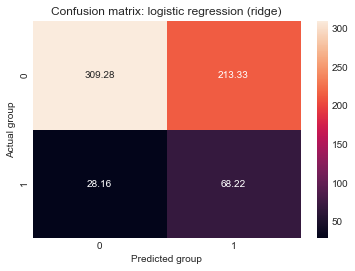

In [65]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf, sample_weight=weights_test)
fig, ax = plt.subplots()

sns.heatmap(cm_rf,
           annot=True,
           fmt='.2f',
           ax=ax)
ax.set(xlabel='Predicted group',
      ylabel='Actual group',
      title='Confusion matrix: logistic regression (ridge)')

[]

[Text(0.5, 0, 'Recall'),
 Text(0, 0.5, 'Precision'),
 Text(0.5, 1.0, 'Precision Recall Curve for Random Forest')]

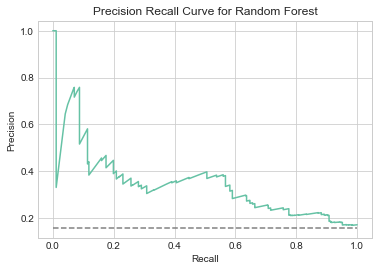

In [66]:
# PR curve
precision_rf, recall_rf, threshold_pr_rf =  precision_recall_curve(y_test, y_test_prob_rf, sample_weight=weights_test)

fig, ax = plt.subplots()
ax.plot(recall_rf, precision_rf)
ax.plot([0,1], [np.average(y_test, weights=weights_test), np.average(y_test, weights=weights_test)],
       color='grey',
       linestyle='dashed')
ax.plot()
ax.set(xlabel='Recall',
      ylabel='Precision',
      title='Precision Recall Curve for Random Forest')

Text(0.75, 0.05, 'AUC score: 0.726')

[Text(0.5, 0, 'False positive rate'),
 Text(0, 0.5, 'True positive rate'),
 Text(0.5, 1.0, 'ROC curve for Random Forest')]

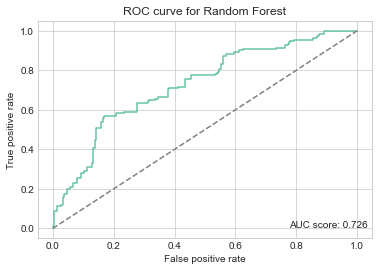

In [67]:
# ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_prob_rf, sample_weight=weights_test)
roc_auc_rf = roc_auc_score(y_test, y_test_prob_rf, sample_weight=weights_test)

fig, ax = plt.subplots()
ax.plot(fpr_rf, tpr_rf)
ax.plot([0, 1], [0,1], linestyle='dashed', color='grey')
ax.text(0.75, 0.05, f'AUC score: {round(roc_auc_rf, 3)}', transform=ax.transAxes)
ax.set(xlabel='False positive rate',
      ylabel='True positive rate',
      title='ROC curve for Random Forest')

# XGBoost

- I use cross validation to pick the nubmer of estiamtor, learning rate, depth of each tree, subsample rate and class weight.

In [68]:
# Grid serach version
grid_xgb = {
    'n_estimators': np.arange(100, 501, 50),
    'learning_rate': [0.01, 0.05],
    'max_depth': [1, 3, 6],
    'subsample': [0.8, 1],
    'scale_pos_weight': np.arange(1, 21, 4)
}

gs_xgb = GridSearchCV(
    XGBClassifier(
        random_state=123,
        use_label_encoder=False
    ),
    param_grid=grid_xgb,
    scoring=my_scorer,
    cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=321)
)

gs_xgb.fit(X_train,
            y_train,
            sample_weight=weights_train,
          verbose=False,
           eval_metric=['logloss'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=321, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     miss...
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [1, 3, 6],
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500]),
                         'scale_pos_weight': array([ 1,  5,  9, 13, 17]),
                         'subsample': [0.8, 1]},
             scoring=ma

In [69]:
print('Parameters picked  by CV')
gs_xgb.best_params_
gs_xgb.best_score_

Parameters picked  by CV


{'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 400,
 'scale_pos_weight': 5,
 'subsample': 0.8}

0.3427056219631298

In [70]:
fit_xgb = gs_xgb.best_estimator_

<BarContainer object of 10 artists>

[Text(0.5, 0, 'Feature importance'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'Feature importance for top 10 features - XGBoost')]

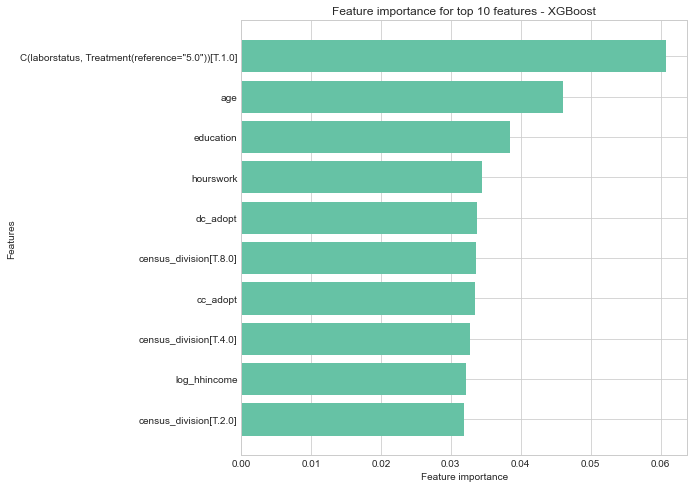

In [71]:
feature_importances_xgb = pd.DataFrame({
    'Var': cols_X_train,
    'Importance': fit_xgb.feature_importances_}) \
    .sort_values(by='Importance')

fig, ax = plt.subplots(figsize=(8,8))
ax.barh(y='Var',
       width='Importance',
       data=feature_importances_xgb.tail(10))
ax.set(xlabel='Feature importance',
      ylabel='Features',
      title='Feature importance for top 10 features - XGBoost')

## Evaluation of performance

In [72]:
# Using the sklearn model
y_train_pred_xgb = fit_xgb.predict(X_train)
y_test_pred_xgb = fit_xgb.predict(X_test)

y_train_prob_xgb = fit_xgb.predict_proba(X_train)[:,1]
y_test_prob_xgb = fit_xgb.predict_proba(X_test)[:,1]

In [73]:
# Calculate the accuracy for training and test
train_accuracy_xgb = np.average(y_train_pred_xgb == y_train, weights=weights_train)
test_accuracy_xgb = np.average(y_test_pred_xgb == y_test, weights=weights_test)

print(f"XGBoost's train data accuracy: {train_accuracy_xgb}")
print(f"XGBoost's test data accuracy: {test_accuracy_xgb}")


XGBoost's train data accuracy: 0.8044417988930767
XGBoost's test data accuracy: 0.7423921563422725


In [74]:
# F1 score
f1_xgb = f1_score(y_test, y_test_pred_xgb, sample_weight=weights_test)
print(f"XGBoost's test F1 score: {f1_xgb}")


XGBoost's test F1 score: 0.4196446307213809


In [75]:
precision_score_xgb = precision_score(y_test, y_test_pred_xgb, sample_weight=weights_test)
recall_score_xgb = recall_score(y_test, y_test_pred_xgb, sample_weight=weights_test)
print(f"XGBoost's precision: {precision_score_xgb}")
print(f"XGBoost's recall: {recall_score_xgb}")

XGBoost's precision: 0.3231950978081075
XGBoost's recall: 0.5981465945477189


<AxesSubplot:>

[Text(0.5, 19.5, 'Predicted group'),
 Text(37.5, 0.5, 'Actual group'),
 Text(0.5, 1.0, 'Confusion matrix: XGB')]

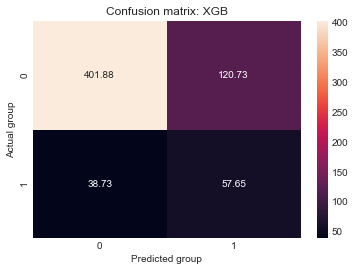

In [76]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb, sample_weight=weights_test)
fig, ax = plt.subplots()

sns.heatmap(cm_xgb,
           annot=True,
           fmt='.2f',
           ax=ax)
ax.set(xlabel='Predicted group',
      ylabel='Actual group',
      title='Confusion matrix: XGB')

[]

[Text(0.5, 0, 'Recall'),
 Text(0, 0.5, 'Precision'),
 Text(0.5, 1.0, 'Precision Recall Curve for XGB')]

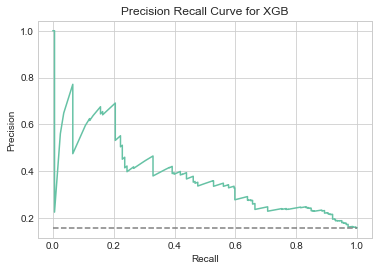

In [77]:
# PR curve
precision_xgb, recall_xgb, threshold_pr_xgb =  precision_recall_curve(y_test, y_test_prob_xgb, sample_weight=weights_test)

fig, ax = plt.subplots()
ax.plot(recall_xgb, precision_xgb)
ax.plot([0,1], [np.average(y_test, weights=weights_test), np.average(y_test, weights=weights_test)],
       color='grey',
       linestyle='dashed')
ax.plot()
ax.set(xlabel='Recall',
      ylabel='Precision',
      title='Precision Recall Curve for XGB')

Text(0.75, 0.05, 'AUC score: 0.742')

[Text(0.5, 0, 'False positive rate'),
 Text(0, 0.5, 'True positive rate'),
 Text(0.5, 1.0, 'ROC curve for XGB')]

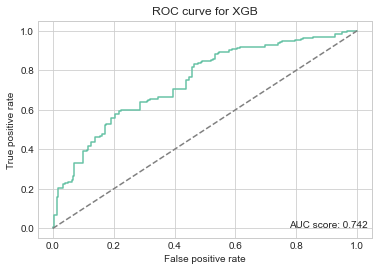

In [78]:
# ROC curve
fpr_xgb, tpr_xgb, thresholds_XGB = roc_curve(y_test, y_test_prob_xgb, sample_weight=weights_test)
roc_auc_xgb = roc_auc_score(y_test, y_test_prob_xgb, sample_weight=weights_test)

fig, ax = plt.subplots()
ax.plot(fpr_xgb, tpr_xgb)
ax.plot([0, 1], [0,1], linestyle='dashed', color='grey')
ax.text(0.75, 0.05, f'AUC score: {round(roc_auc_xgb, 3)}', transform=ax.transAxes)
ax.set(xlabel='False positive rate',
      ylabel='True positive rate',
      title='ROC curve for XGB')

# Comparison and Summary

[Text(0.5, 0, 'False positive rate'),
 Text(0, 0.5, 'True positive rate'),
 Text(0.5, 1.0, 'ROC curve comparison')]

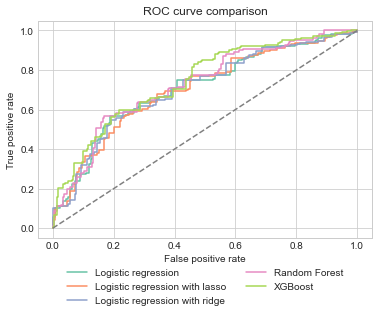

In [79]:
# Plotting all the ROC curves in the same model
fig, ax = plt.subplots()
list_fpr = [fpr_logit, fpr_logit_lasso, fpr_logit_ridge, fpr_rf, fpr_xgb]
list_tpr = [tpr_logit, tpr_logit_lasso, tpr_logit_ridge, tpr_rf, tpr_xgb]
list_model_names = ['Logistic regression', 'Logistic regression with lasso',
                   'Logistic regression with ridge', 'Random Forest',
                   'XGBoost']

for a, b, lbl in zip(list_fpr, list_tpr, list_model_names):
    ax.plot(a, b, label=lbl)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)


ax.plot([0, 1], [0,1], linestyle='dashed', color='grey')
# ax.text(0.75, 0.05, f'AUC score: {round(roc_auc_xgb, 3)}', transform=ax.transAxes)
ax.set(xlabel='False positive rate',
      ylabel='True positive rate',
      title='ROC curve comparison')

In [80]:
# Putting all the F1 score, precision and recall in one data frame
pd.DataFrame(
    {
        'model': ['Logistic regression', 'Logistic regression with lasso', 'Logistic regression with ridge',
                 'Random Forest', 'XGBoost'],
        'f1_score': [f1_logit, f1_lasso, f1_ridge, f1_rf, f1_xgb],
        'precision': [precision_score_logit, precision_score_lasso, precision_score_ridge, precision_score_rf, precision_score_xgb],
        'recall': [recall_score_logit, recall_score_lasso, recall_score_ridge, recall_score_rf, recall_score_xgb],
        'test_accuracy': [test_accuracy_logit, test_accuracy_lasso, test_accuracy_ridge,
                         test_accuracy_rf, test_accuracy_xgb]
        
    }
).sort_values('f1_score', ascending=False)

,model,f1_score,precision,recall,test_accuracy
4,XGBoost,0.419645,0.323195,0.598147,0.742392
2,Logistic regression with ridge,0.399840,0.311779,0.557228,0.739533
1,Logistic regression with lasso,0.394681,0.310182,0.542455,0.740916
3,Random Forest,0.361026,0.242306,0.707840,0.609862
0,Logistic regression,0.180520,0.755589,0.102505,0.855091
